In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

# Juntar datasets de testes

In [2]:
import os

mypath = "../data"
test_names = [f for f in os.listdir(mypath) if "test" in f]
test_files = [pd.read_csv("../data/%s"  % file, header = None) for file in test_names]
test = pd.concat(test_files, axis = 0, ignore_index = True)

# export to csv
testfilename = "../data/modified/blogData_test.csv"
test.to_csv(testfilename, index=False, header=False)
print(testfilename + " criado!")

../data/modified/blogData_test.csv criado!


# Informações do Dataset de treino

In [3]:
dataset_train = pd.read_csv('../data/blogData_train.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])

In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, X1 to Y
dtypes: float64(281)
memory usage: 112.3 MB


In [5]:
dataset_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X272,X273,X274,X275,X276,X277,X278,X279,X280,Y
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


## Attribute Information:

|        Line       |                                                                                                                                  Description                                                                                                                                  |
|:-----------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|  **1**...**50**   | Average, standard deviation, min, max and median of the  Attributes 51...60 for the source of the current blog post  With source we mean the blog on which the post appeared.  For example, myblog.blog.org would be the source of  the post myblog.blog.org/post_2010_09_10  |
|       **51**      |                                                                                                                   Total number of comments *before* basetime                                                                                                                  |
|       **52**      |                                                                                                         Number of comments in the last 24 hours *before* the basetime                                                                                                         |
|       **53**      |                                         Let T1 denote the datetime 48 hours *before* basetime,  Let T2 denote the datetime 24 hours *before* basetime.  This attribute is the number of comments in the time period  between T1 and T2                                        |
|       **54**      |                                                                                    Number of comments in the first 24 hours after the  publication of the blog post, but *before* basetime                                                                                    |
|       **55**      |                                                                                                                    The diference of attribute *52* and *53*                                                                                                                   |
|  **56**...**60**  |                                              The same features as the attributes *51*...*55*, but  features *56*...*60* refer to the number of links (trackbacks),  while features *51*...*55* refer to the number of comments.                                               |
|       **61**      |                                                                                                   The length of time between the publication of the blog post  and basetime                                                                                                   |
|       **62**      |                                                                                                                          The length of the blog post                                                                                                                          |
|  **63**...**262** |                                                                                              The 200 bag of *words* features for 200 frequent words of the  text of the blog post                                                                                             |
| **263**...**269** |                                                                                              binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the basetime                                                                                             |
| **270**...**276** |                                                                              binary indicator features (0 or 1) for the weekday  (Monday...Sunday) of the date of publication of the blog  post                                                                               |
|      **277**      |                                                                          Number of parent pages: we consider a blog post P as a  parent of blog post B, if B is a reply (trackback) to  blog post P.                                                                          |
| **278**...**280** |                                                                                                     Minimum, maximum, average number of comments that the parents received                                                                                                    |
|      **281**      |                                                                                                The target: the number of comments in the next 24 hours  (relative to basetime)                                                                                                |
                                                                                                               |

In [6]:
print(dataset_train.corr()[:]["Y"])

X1      0.485464
X2      0.424616
X3      0.053221
X4      0.356604
X5      0.491707
X6      0.497631
X7      0.433578
X8      0.034916
X9      0.322106
X10     0.506540
X11     0.490111
X12     0.439152
X13          NaN
X14     0.322775
X15     0.489674
X16     0.471999
X17     0.384654
X18     0.053221
X19     0.299688
X20     0.486316
X21     0.503375
X22     0.440003
X23    -0.280792
X24     0.320133
X25    -0.004137
X26     0.328525
X27     0.266815
X28    -0.001228
X29     0.247457
X30     0.338961
          ...   
X252    0.017291
X253   -0.002369
X254    0.013099
X255    0.008334
X256   -0.001284
X257    0.013151
X258    0.001495
X259    0.003610
X260    0.005246
X261    0.019466
X262   -0.002411
X263   -0.004619
X264    0.017965
X265    0.011630
X266    0.001922
X267   -0.009389
X268   -0.008288
X269   -0.007110
X270   -0.000284
X271    0.004695
X272   -0.003085
X273   -0.007672
X274    0.008056
X275    0.000869
X276   -0.002905
X277   -0.005661
X278         NaN
X279   -0.0023

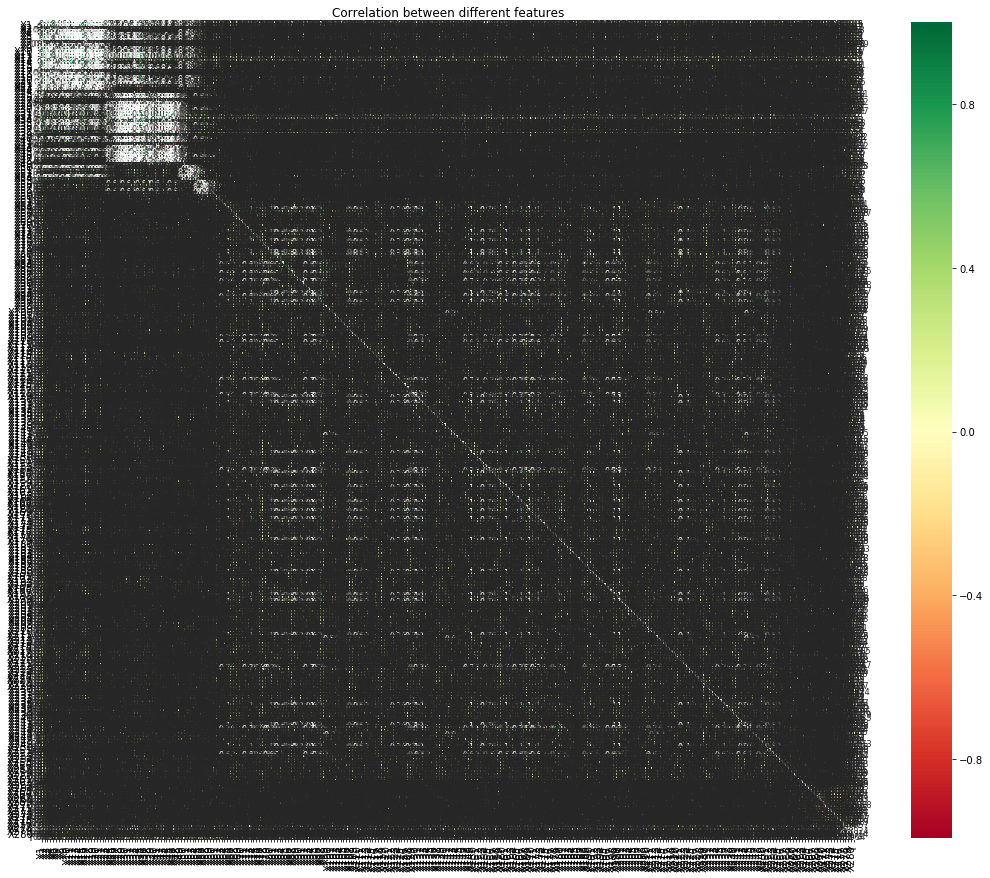

In [7]:
correlation = dataset_train.corr()
plt.figure(figsize=(20,15))
g = sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdYlGn',xticklabels=True,yticklabels=True, annot_kws={"size":8})


# g.set_yticklabels(g.get_yticklabels(), rotation =0)
# g.set_xticklabels(g.get_yticklabels(), size=7, rotation =90)
plt.title('Correlation between different features')
plt.show()

# Engenharia de características

## Variance threshold

In [8]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [9]:
dataset_test = pd.read_csv('../data/modified/blogData_test.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])

In [10]:
x_train = dataset_train.drop(dataset_train["Y"])
y_train = dataset_train.iloc[:, -1]

x_train_vt = vt.fit_transform(x_train, y_train)

x_test = dataset_test.drop(dataset_test["Y"])
y_test = dataset_test.iloc[:, -1]

x_test_vt = vt.fit_transform(x_test, y_test)

In [11]:
result = vt.get_support()

false_indexes = [x+1 for x in range(len(result)) if not result[x]]
print(false_indexes)

[13, 28, 31, 33, 35, 36, 38, 40, 43, 46, 50, 63, 64, 65, 66, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 

In [12]:
dataset_new = dataset_train
testset_new = dataset_test
for x in false_indexes:
    dataset_new = dataset_new.drop("X"+str(x), axis=1)
    testset_new = testset_new.drop("X"+str(x), axis=1)

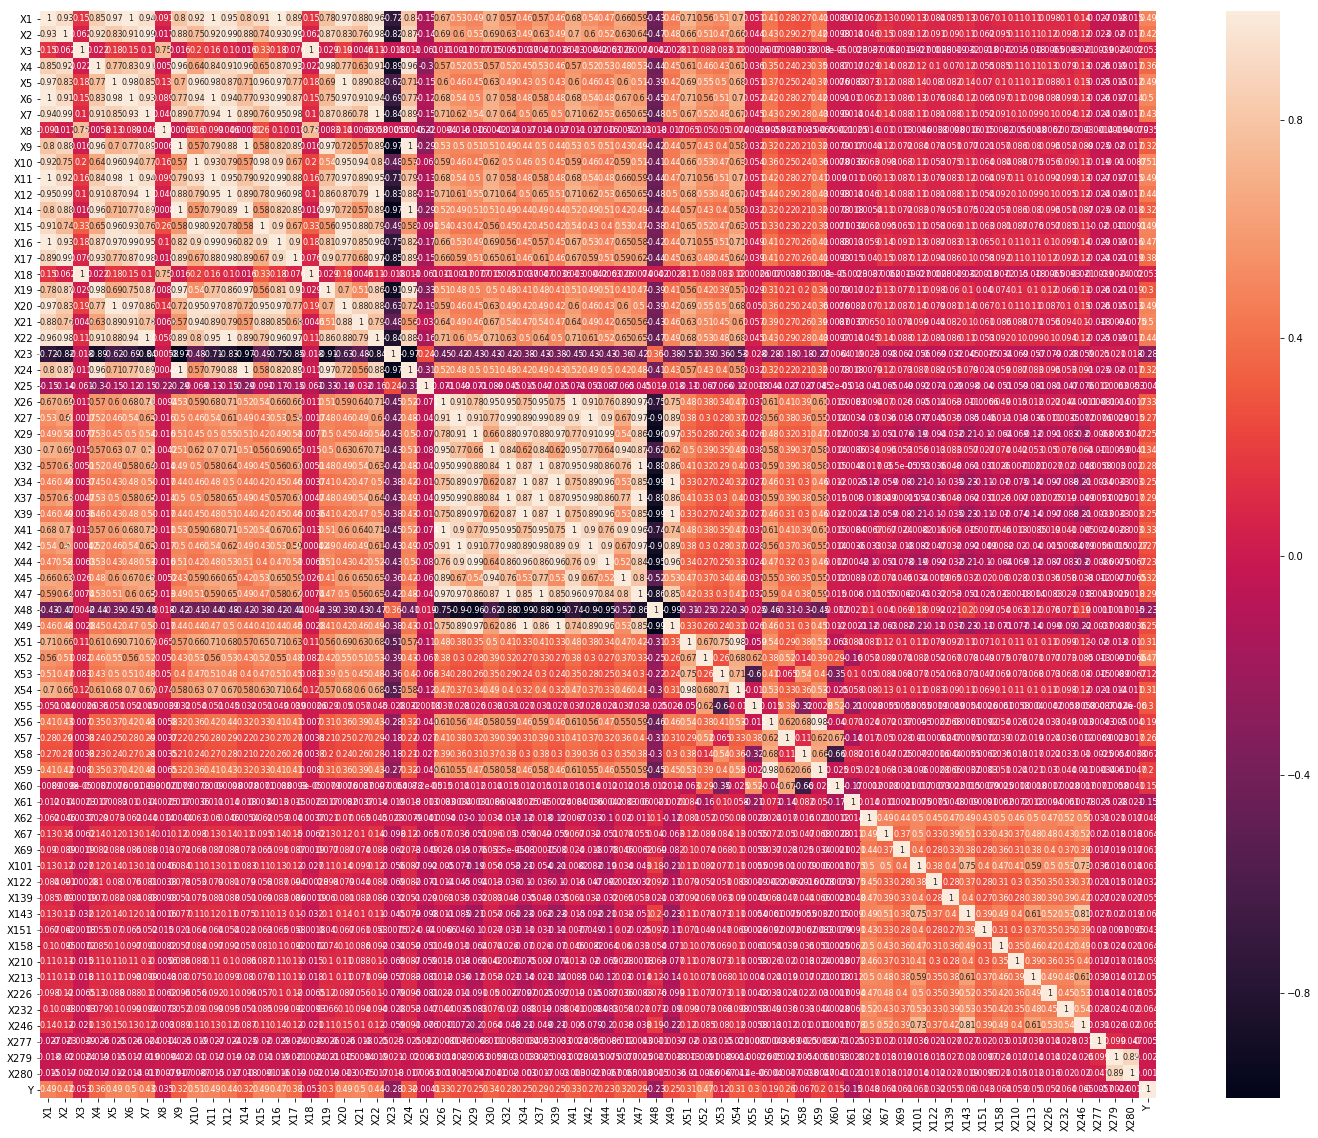

In [13]:
plt.figure(figsize=(25,20))
sns.heatmap(dataset_new.corr(),annot=True, annot_kws={"size": 8})
plt.show()

In [14]:
print(dataset_new.shape)
print(testset_new.shape)

(52397, 68)
(7624, 68)


In [15]:
newcsv = "../data/modified/blogData_newTrain.csv"
dataset_new.to_csv(newcsv, index=False)
print(newcsv + " criado!")

newtestcsv = "../data/modified/blogData_newTest.csv"
testset_new.to_csv(newtestcsv, index=False)
print(newtestcsv + " criado!")

../data/modified/blogData_newTrain.csv criado!
../data/modified/blogData_newTest.csv criado!


In [16]:
del dataset_new
del testset_new
del dataset_train
del dataset_test

## Extra Trees

In [17]:
dataset_train = pd.read_csv('../data/blogData_train.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])
dataset_test = pd.read_csv('../data/modified/blogData_test.csv', header=None, names=["X"+str(x) if x != 281 else "Y" for x in range(1, 282)])

In [18]:
x_train = dataset_train.iloc[:, :-2]
y_train = dataset_train.iloc[:, -1]

print(len(x_train), len(y_train))

52397 52397


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
model = SelectFromModel(clf, prefit=True)
aux = model.get_support()
false_idx = [x for x in range(len(aux)) if not aux[x]]

dataset_trainnew = dataset_train
dataset_testnew = dataset_test

for x in false_idx:
    dataset_trainnew = dataset_trainnew.drop("X"+str(x), axis=1)
    dataset_testnew = dataset_testnew.drop("X"+str(x), axis=1)

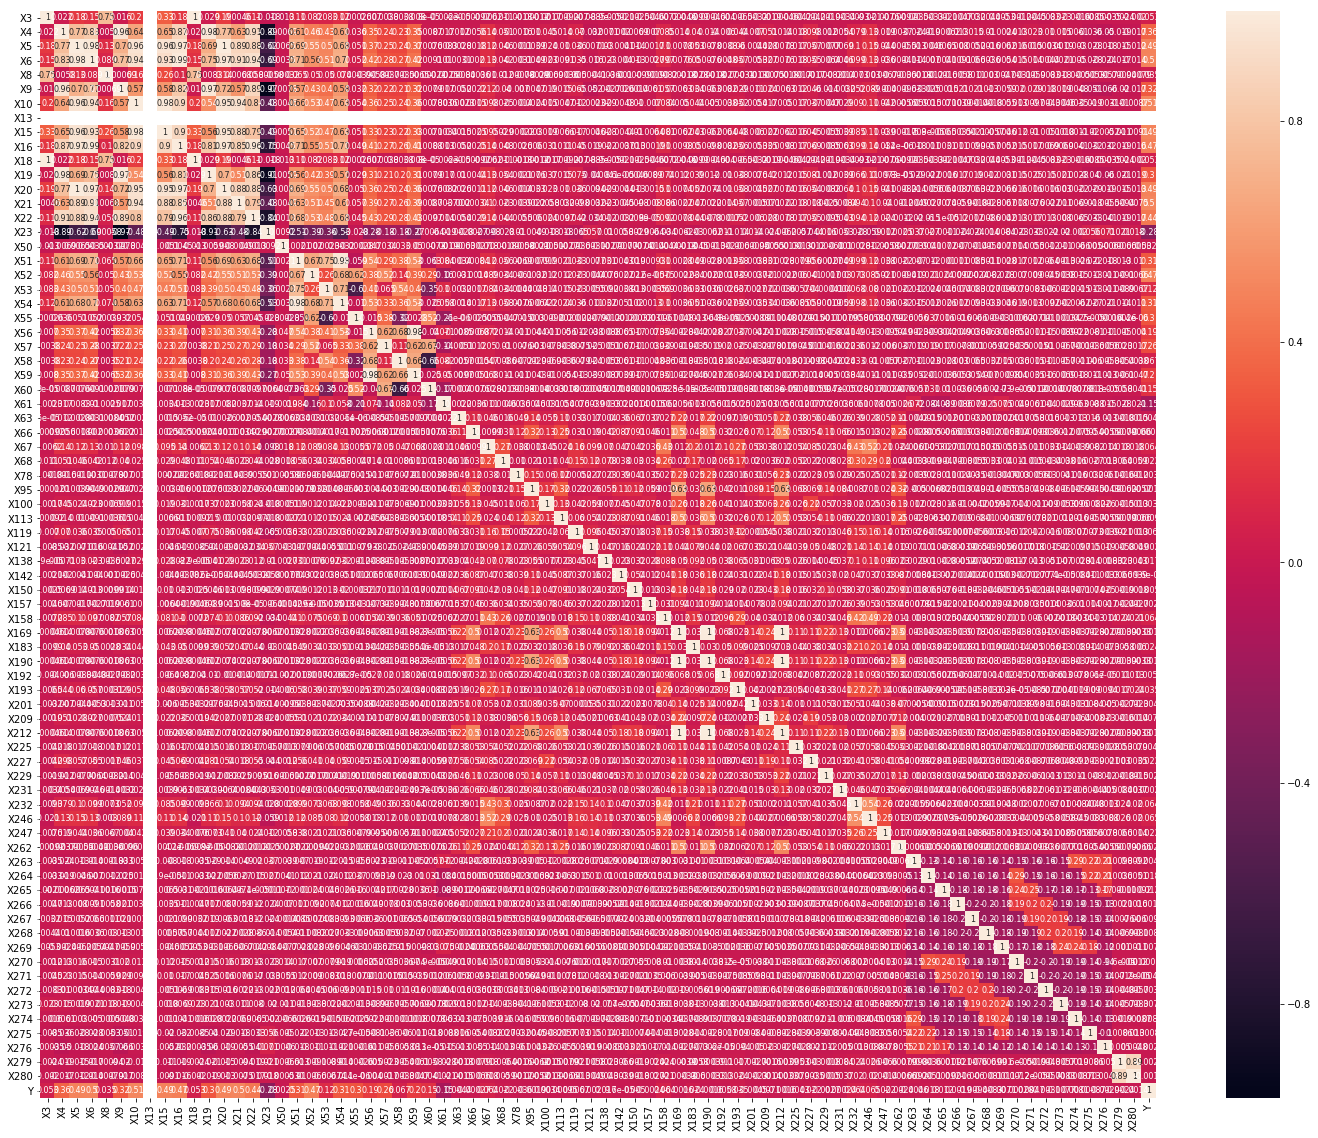

In [21]:
plt.figure(figsize=(25,20))
sns.heatmap(dataset_trainnew.corr(),annot=True, annot_kws={"size": 8})
plt.show()

In [22]:
print(dataset_trainnew.shape)
print(dataset_testnew.shape)

(52397, 76)
(7624, 76)


In [23]:
newcsv = "../data/modified/blogData_newTrainET.csv"
dataset_trainnew.to_csv(newcsv, index=False)
print(newcsv + " criado!")

newtestcsv = "../data/modified/blogData_newTestET.csv"
dataset_testnew.to_csv(newtestcsv, index=False)
print(newtestcsv + " criado!")

../data/modified/blogData_newTrainET.csv criado!
../data/modified/blogData_newTestET.csv criado!
